In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [2]:
df = pd.read_csv('Walmart_Store_sales.csv')
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
7,20.0,03-02-2012,2203523.20,0.0,39.93,3.617,213.023622,6.961
8,14.0,10-12-2010,2600519.26,0.0,30.54,3.109,NaN,NaN
9,3.0,NaN,418925.47,0.0,60.12,3.555,224.132020,6.833


In [3]:
df.tail(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
140,3.0,07-01-2011,NaN,0.0,53.35,2.976,214.695510,7.551
141,5.0,12-11-2010,301827.36,0.0,62.37,NaN,212.560411,6.768
142,3.0,07-10-2011,403342.40,0.0,75.54,3.285,NaN,7.197
143,3.0,04-06-2010,396968.80,0.0,78.53,2.705,214.495838,7.343
144,3.0,19-10-2012,424513.08,0.0,73.44,3.594,226.968844,6.034
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
146,7.0,NaN,716388.81,NaN,20.74,2.778,NaN,NaN
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN
149,19.0,20-04-2012,1255087.26,0.0,55.20,4.170,137.923067,8.150


In [4]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
mean,9.866667,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000
max,20.000000,2.771397e+06,1.000000,91.650000,4.193000,226.968844,14.313000


In [5]:
df.isnull()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,True,False,True,True,False,False
3,False,True,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
145,False,False,False,False,False,False,False,False
146,False,True,False,True,False,False,True,True
147,False,False,False,False,False,False,False,True
148,False,False,False,False,False,False,False,True


In [6]:
df.isnull().sum()

Store            0
Date            18
Weekly_Sales    14
Holiday_Flag    12
Temperature     18
Fuel_Price      14
CPI             12
Unemployment    15
dtype: int64

In [7]:
df.dropna(subset=['Date', 'Weekly_Sales'], inplace= True)
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
144,3.0,19-10-2012,424513.08,0.0,73.44,3.594,226.968844,6.034
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN
149,19.0,20-04-2012,1255087.26,0.0,55.20,4.170,137.923067,8.150


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df= df.sort_values('Date')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
67,3.0,2010-02-05,461622.22,0.0,45.71,2.572,214.424881,7.368
44,1.0,2010-02-12,1641957.44,1.0,38.51,2.548,211.242170,8.106
107,8.0,2010-02-12,994801.40,1.0,33.34,2.548,214.621419,6.299
115,15.0,2010-02-19,660838.75,0.0,NaN,2.909,131.637000,NaN
112,2.0,2010-02-19,2124451.54,0.0,39.69,2.514,210.945160,NaN


Now we have some missing values in CPI column : we can pick up CPI value on internet for each date in dataframe where CPI value is Nan

In [2]:

# pick up on internet missing CPI value
missing_CPI = {'2010-12-10': 218.803,
    '2010-08-20' : 218.312,
    '2011-12-16' : 225.672,
    '2012-01-13' : 226.665,
    '2012-02-10' : 227.663,
    '2010-12-17' : 219.179,
    '2011-07-29' : 225.922,
    '2010-09-24' : 218.439,
    '2010-02-26' : 216.741,
    '2011-10-07' : 226.421}

In [3]:

# Convert dictionnary keys of missing_CPI in datetime if they still not are
missing_CPI = {pd.to_datetime(date): cpi for date, cpi in missing_CPI.items()}

# Then replace NaN in 'CPI' column using the missing_CPI dictionnary
df.loc[df['CPI'].isnull() & df['Date'].isin(missing_CPI), 'CPI'] = df['Date'].map(missing_CPI)

NameError: name 'pd' is not defined

In [11]:
df.head(8)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
67,3.0,2010-02-05,461622.22,0.0,45.71,2.572,214.424881,7.368
44,1.0,2010-02-12,1641957.44,1.0,38.51,2.548,211.242170,8.106
107,8.0,2010-02-12,994801.40,1.0,33.34,2.548,214.621419,6.299
115,15.0,2010-02-19,660838.75,0.0,NaN,2.909,131.637000,NaN
112,2.0,2010-02-19,2124451.54,0.0,39.69,2.514,210.945160,NaN
106,14.0,2010-02-26,2095591.63,0.0,34.89,NaN,216.741000,8.992
96,8.0,2010-03-12,860336.16,0.0,49.76,NaN,214.749245,6.299
23,19.0,2010-03-26,1427023.45,0.0,39.07,2.963,131.863129,8.350


In [12]:
mean_temp = df['Temperature'].mean()
std_temp = df['Temperature'].std()

mean_fuel = df['Fuel_Price'].mean()
std_fuel = df['Fuel_Price'].std()

mean_un = df['Unemployment'].mean()
std_un = df['Unemployment'].std()

mean_cpi = df['CPI'].mean()
std_cpi = df['CPI'].std()

# Filtrer les outliers pour chaque colonne spécifique
outliers_temp = (df['Temperature'] < (mean_temp - 3 * std_temp)) | (df['Temperature'] > (mean_temp + 3 * std_temp))
outliers_fuel = (df['Fuel_Price'] < (mean_fuel - 3 * std_fuel)) | (df['Fuel_Price'] > (mean_fuel + 3 * std_fuel))
outliers_un = (df['Unemployment'] < (mean_un - 3 * std_un)) | (df['Unemployment'] > (mean_un + 3 * std_un))
outliers_cpi = (df['CPI'] < (mean_cpi - 3 * std_cpi)) | (df['CPI'] > (mean_cpi + 3 * std_cpi))

# Combiner les filtres d'outliers pour toutes les colonnes spécifiées
outliers_combined = outliers_temp | outliers_fuel | outliers_un | outliers_cpi

# Créer un nouveau DataFrame sans les outliers
df= df[~outliers_combined]
df.head(12)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
67,3.0,2010-02-05,461622.22,0.0,45.71,2.572,214.424881,7.368
44,1.0,2010-02-12,1641957.44,1.0,38.51,2.548,211.242170,8.106
107,8.0,2010-02-12,994801.40,1.0,33.34,2.548,214.621419,6.299
115,15.0,2010-02-19,660838.75,0.0,NaN,2.909,131.637000,NaN
112,2.0,2010-02-19,2124451.54,0.0,39.69,2.514,210.945160,NaN
106,14.0,2010-02-26,2095591.63,0.0,34.89,NaN,216.741000,8.992
96,8.0,2010-03-12,860336.16,0.0,49.76,NaN,214.749245,6.299
23,19.0,2010-03-26,1427023.45,0.0,39.07,2.963,131.863129,8.350
20,7.0,2010-04-02,561145.14,0.0,38.26,2.725,189.704822,8.963
28,17.0,2010-04-16,757738.76,0.0,45.22,2.915,126.562100,6.635


In [13]:
# remplacer Nan de Temperature par mean, idem pour Fuel_Price et unemployement
mean_temp = 61.398106
mean_Fuel_Price = 3.320853
mean_Un= 7.598430
df['Temperature'] = df['Temperature'].fillna(mean_temp)
df['Fuel_Price'] = df['Fuel_Price'].fillna(mean_Fuel_Price)
df['Unemployment'] = df['Unemployment'].fillna(mean_Un)
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
67,3.0,2010-02-05,461622.22,0.0,45.710000,2.572000,214.424881,7.36800
44,1.0,2010-02-12,1641957.44,1.0,38.510000,2.548000,211.242170,8.10600
107,8.0,2010-02-12,994801.40,1.0,33.340000,2.548000,214.621419,6.29900
115,15.0,2010-02-19,660838.75,0.0,61.398106,2.909000,131.637000,7.59843
112,2.0,2010-02-19,2124451.54,0.0,39.690000,2.514000,210.945160,7.59843
106,14.0,2010-02-26,2095591.63,0.0,34.890000,3.320853,216.741000,8.99200
96,8.0,2010-03-12,860336.16,0.0,49.760000,3.320853,214.749245,6.29900
23,19.0,2010-03-26,1427023.45,0.0,39.070000,2.963000,131.863129,8.35000
20,7.0,2010-04-02,561145.14,0.0,38.260000,2.725000,189.704822,8.96300
28,17.0,2010-04-16,757738.76,0.0,45.220000,2.915000,126.562100,6.63500


In [14]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df['Day of week']=df['Date'].dt.day_of_week # avec lundi=0 et dimanche=6
df.head(10)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day of week
67,3.0,2010-02-05,461622.22,0.0,45.710000,2.572000,214.424881,7.36800,2010,2,5,4
44,1.0,2010-02-12,1641957.44,1.0,38.510000,2.548000,211.242170,8.10600,2010,2,12,4
107,8.0,2010-02-12,994801.40,1.0,33.340000,2.548000,214.621419,6.29900,2010,2,12,4
115,15.0,2010-02-19,660838.75,0.0,61.398106,2.909000,131.637000,7.59843,2010,2,19,4
112,2.0,2010-02-19,2124451.54,0.0,39.690000,2.514000,210.945160,7.59843,2010,2,19,4
106,14.0,2010-02-26,2095591.63,0.0,34.890000,3.320853,216.741000,8.99200,2010,2,26,4
96,8.0,2010-03-12,860336.16,0.0,49.760000,3.320853,214.749245,6.29900,2010,3,12,4
23,19.0,2010-03-26,1427023.45,0.0,39.070000,2.963000,131.863129,8.35000,2010,3,26,4
20,7.0,2010-04-02,561145.14,0.0,38.260000,2.725000,189.704822,8.96300,2010,4,2,4
28,17.0,2010-04-16,757738.76,0.0,45.220000,2.915000,126.562100,6.63500,2010,4,16,4


In [15]:
df=df.drop('Date', axis=1)
df.head(10)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day of week
67,3.0,461622.22,0.0,45.710000,2.572000,214.424881,7.36800,2010,2,5,4
44,1.0,1641957.44,1.0,38.510000,2.548000,211.242170,8.10600,2010,2,12,4
107,8.0,994801.40,1.0,33.340000,2.548000,214.621419,6.29900,2010,2,12,4
115,15.0,660838.75,0.0,61.398106,2.909000,131.637000,7.59843,2010,2,19,4
112,2.0,2124451.54,0.0,39.690000,2.514000,210.945160,7.59843,2010,2,19,4
106,14.0,2095591.63,0.0,34.890000,3.320853,216.741000,8.99200,2010,2,26,4
96,8.0,860336.16,0.0,49.760000,3.320853,214.749245,6.29900,2010,3,12,4
23,19.0,1427023.45,0.0,39.070000,2.963000,131.863129,8.35000,2010,3,26,4
20,7.0,561145.14,0.0,38.260000,2.725000,189.704822,8.96300,2010,4,2,4
28,17.0,757738.76,0.0,45.220000,2.915000,126.562100,6.63500,2010,4,16,4


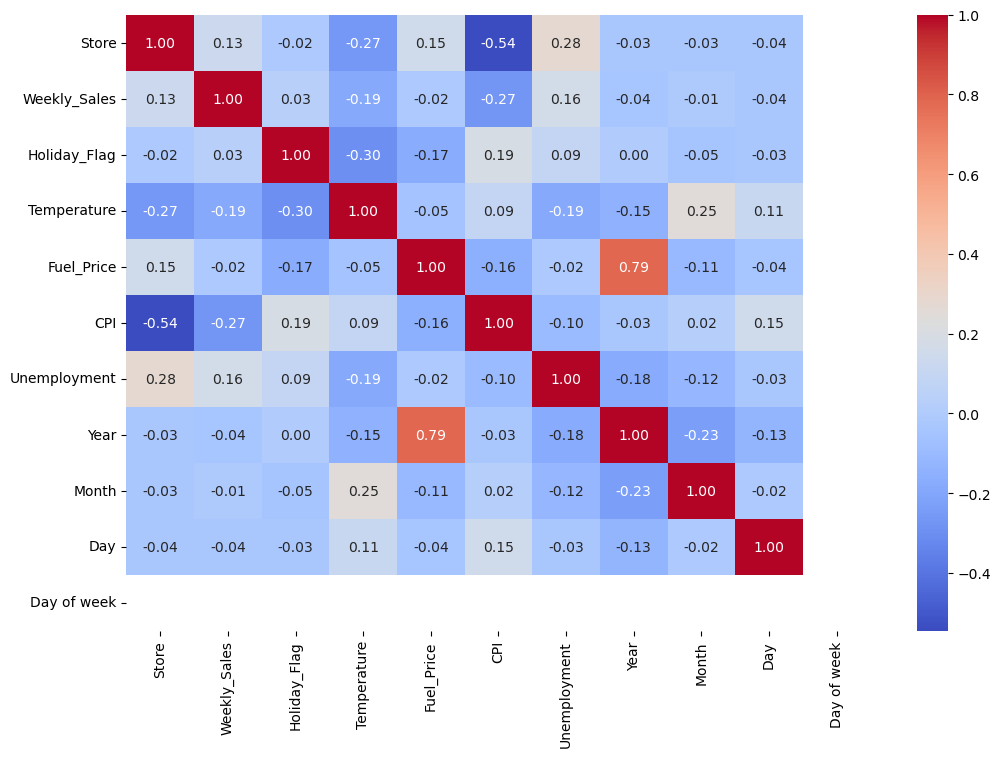

In [16]:
correlation_matrix = df.corr()

# Affichage heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [17]:
# 'Fuel_Price' matches with 'Year' so we have to remove one : drop 'Fuel_Price'
df=df.drop(['Fuel_Price'], axis=1)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,CPI,Unemployment,Year,Month,Day,Day of week
67,3.0,461622.22,0.0,45.710000,214.424881,7.36800,2010,2,5,4
44,1.0,1641957.44,1.0,38.510000,211.242170,8.10600,2010,2,12,4
107,8.0,994801.40,1.0,33.340000,214.621419,6.29900,2010,2,12,4
115,15.0,660838.75,0.0,61.398106,131.637000,7.59843,2010,2,19,4
112,2.0,2124451.54,0.0,39.690000,210.945160,7.59843,2010,2,19,4


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

In [19]:
# Separate target variable Y from features X

print("Separating labels from features...")
Y = df['Weekly_Sales']
X = df[['Store', 'Holiday_Flag', 'Temperature', 'CPI', 'Unemployment', 'Year',
       'Month', 'Day', 'Day of week']] # All columns are kept, except the target
print("...Done.")
print(Y.head())
print()
print(X.head())
print()

Separating labels from features...
...Done.
67      461622.22
44     1641957.44
107     994801.40
115     660838.75
112    2124451.54
Name: Weekly_Sales, dtype: float64

     Store  Holiday_Flag  Temperature         CPI  Unemployment  Year  Month  \
67     3.0           0.0    45.710000  214.424881       7.36800  2010      2   
44     1.0           1.0    38.510000  211.242170       8.10600  2010      2   
107    8.0           1.0    33.340000  214.621419       6.29900  2010      2   
115   15.0           0.0    61.398106  131.637000       7.59843  2010      2   
112    2.0           0.0    39.690000  210.945160       7.59843  2010      2   

     Day  Day of week  
67     5            4  
44    12            4  
107   12            4  
115   19            4  
112   19            4  



In [20]:
# First : Divide our dataset into train set & test set !!
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [21]:
# Create pipeline for numeric features
numeric_features = ['Temperature', 'CPI', 'Unemployment', 'Year', 'Month', 'Day',
                    'Day of week'] # Names of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # missing values will be replaced by columns' median
    ('scaler', StandardScaler())
])

In [22]:
# Create pipeline for categorical features
categorical_features = ['Store', 'Holiday_Flag']  # Names of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # missing values will be replaced by most frequent value
        ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))  # ignore unknown categories during transform
    ])

In [23]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [24]:
type(X_train)

pandas.core.frame.DataFrame

In [25]:
type(Y_train)

pandas.core.series.Series

In [26]:
type(X_test)

pandas.core.frame.DataFrame

In [27]:
type(Y_test)

pandas.core.series.Series

In [28]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
#print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
#print(X_test.head()) 
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax here too because X_test too is a numpy array and not a pandas DataFrame anymore
print()

Performing preprocessings on train set...
...Done.
[[ 0.60153753  0.73268698  0.17397997 -1.01223053  1.39253575  1.16828792
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.          0.          0.
   1.        ]
 [-1.31630915  0.05001833  1.66888011 -1.01223053 -0.76829558 -1.8075398
   0.          0.          0.          0.          0.          0.
   1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.04448914  0.82714702 -1.17666605  0.23572492  1.39253575 -0.69160441
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [-0.59681357  1.01835335  0.04254844  0.23572492  1.70122594 -0.0716403
   0.          1

c:\Users\taver\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
c:\Users\taver\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [29]:
type(X_train)

numpy.ndarray

In [30]:
type(X_test)

numpy.ndarray

In [31]:
type(Y_train)

pandas.core.series.Series

In [32]:
type(Y_test)

pandas.core.series.Series

In [33]:
# Train model
model = LinearRegression()

print("Training model...")
model.fit(X_train, Y_train) # Training on train set
print("...Done.")

Training model...
...Done.


In [34]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = model.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()

Predictions on training set...
...Done.
[1757242.51        616813.65499175  405053.35016556 2108638.59301716
  526429.42141913]



In [35]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = model.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()

Predictions on test set...
...Done.
[1253019.9726793  1510069.35651742 1862635.20881053 1429810.49197298
  902531.37509107]



In [41]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Prédictions sur le train set
Y_train_pred = model.predict(X_train)

# Prédictions sur le test-set
Y_test_pred = model.predict(X_test)

# Calcul des métriques de régression
mse_test = mean_squared_error(Y_test, Y_test_pred)
rmse_test = mean_squared_error(Y_test, Y_test_pred, squared=False)
mae_test = mean_absolute_error(Y_test, Y_test_pred)
r2_test = r2_score(Y_test, Y_test_pred)

mse_train = mean_squared_error(Y_train, Y_train_pred)
rmse_train = mean_squared_error(Y_train, Y_train_pred, squared=False)
mae_train = mean_absolute_error(Y_train, Y_train_pred)
r2_train = r2_score(Y_train, Y_train_pred)

# Résultats
print("MSE on test set:", mse_test, "/", "MSE on train set:", mse_train)
print("RMSE on test set:", rmse_test, "/", "RMSE on train set:" , rmse_train)
print("MAE on test set:", mae_test, "/", "MAE on train set:", mae_train)
print("R² on test set:", r2_test, "/", "R² on train set:", r2_train)

MSE on test set: 76820582083.0914 / MSE on train set: 12248819785.385149
RMSE on test set: 277165.26132091554 / RMSE on train set: 110674.3863113103
MAE on test set: 173956.07027267644 / MAE on train set: 86214.34128774537
R² on test set: 0.8004162292601565 / R² on train set: 0.973666689826972


In [42]:
# let's go for regularization
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

regressor = Ridge()

# cross validation: cv=3
# going with 'scoring=r2' as argument even if given => could MSE be passed ?
scores = cross_val_score(regressor, X_train, Y_train, cv=3, scoring='r2')

# Results
print("3-fold cross-validation...")
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

3-fold cross-validation...
The cross-validated R2-score is :  0.5644088715723371
The standard deviation is :  0.35063242972753755


In [44]:
# R2-score less good after Ridge 
# => alpha too big ?

# Perform grid search
from sklearn.model_selection import GridSearchCV

print("Grid search...")
regressor = Ridge()
# Grid of values to be tested
params = {
    'alpha': [0.0, 0.1, 0.5, 1.0] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)


Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.0}
Best R2 score :  0.8558536057091114


In [ ]:
# R2 goes from 0.8 to 0.855 if we let alpha = 0

In [48]:
# Trying Optuna
# I had to open a VSCode "new terminal" in which doing pip install Optuna
# to then import it in this NB

import optuna
from sklearn.metrics import r2_score

def objective(trial):
    # Suggestion d'une valeur pour alpha
    alpha = trial.suggest_float('alpha', 0.0, 1.0)
    
    # Création et évaluation du modèle avec la valeur suggérée d'alpha
    model = Ridge(alpha=alpha)
    score = cross_val_score(model, X_train, Y_train, n_jobs=-1, cv=3, scoring='r2').mean()
    return score

# n_jobs= -1 : va lancer tous les coeurs de CPU pour faire le job

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print('Meilleur score R2:', study.best_value)
print('Meilleurs hyperparamètres:', study.best_params)


[I 2023-12-13 00:12:02,001] A new study created in memory with name: no-name-74b9d830-e8e2-463b-9eea-d7d7dbee1dae
[I 2023-12-13 00:12:04,420] Trial 0 finished with value: 0.6714738943820465 and parameters: {'alpha': 0.46551260438846587}. Best is trial 0 with value: 0.6714738943820465.
[I 2023-12-13 00:12:05,075] Trial 1 finished with value: 0.6515698995870771 and parameters: {'alpha': 0.5490029071351938}. Best is trial 0 with value: 0.6714738943820465.
[I 2023-12-13 00:12:05,775] Trial 2 finished with value: 0.6012121783384097 and parameters: {'alpha': 0.7927166158483699}. Best is trial 0 with value: 0.6714738943820465.
[I 2023-12-13 00:12:06,450] Trial 3 finished with value: 0.5659124672251757 and parameters: {'alpha': 0.991047667745461}. Best is trial 0 with value: 0.6714738943820465.
[I 2023-12-13 00:12:07,091] Trial 4 finished with value: 0.7706700006144093 and parameters: {'alpha': 0.15520197877792685}. Best is trial 4 with value: 0.7706700006144093.
[I 2023-12-13 00:12:07,804] Tr

Meilleur score R2: 0.8557715893387021
Meilleurs hyperparamètres: {'alpha': 0.00012161773405491155}


In [ ]:
# Optuna gets same r2 than Ridge
